## First calibration

Calibration date: October 25th, 2018

Conductivity solution standards provided by Roger Pieters

Script settings: 'mac', portnum= 3

|Parameter|Value|
|::|::|
|Lab temperature|20 $^{\circ}$C|
|nsamples|500|
|channel|1|
|probe|37|
 

Variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [93]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

../probe37_25oct18/00010microseimen_per_cm_500samp.mat
../probe37_25oct18/00100microseimen_per_cm_500samp.mat
../probe37_25oct18/01000microseimen_per_cm_500samp.mat
../probe37_25oct18/01413microseimen_per_cm_500samp.mat
../probe37_25oct18/10000microseimen_per_cm_500samp.mat
../probe37_25oct18/noprob_500samp.mat
../probe37_25oct18/tap_water_500samp.mat


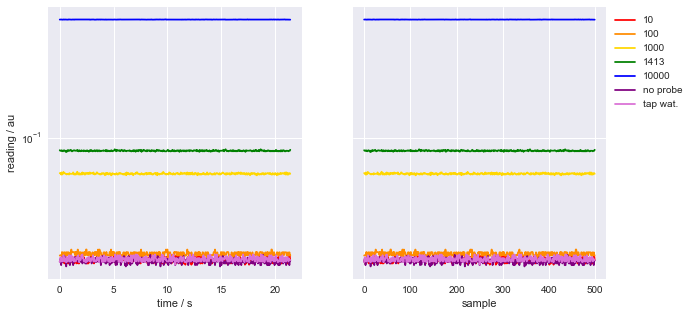

In [96]:
file_num = 7
colors = ['red','darkorange','gold','green','blue', 'purple', 'orchid']
cond = np.array([10, 100, 1000, 1413, 10000, 0, 0])
labels = np.array(['10', '100', '1000', '1413', '10000', 'no probe', 'tap wat.'])

mean_read = np.zeros(file_num)
std_read = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

for filepath, ii, col, lab in zip(glob.iglob('../probe37_25oct18/*.mat'), 
                                  range(file_num), colors, labels):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read[ii] = np.mean(ch1)
    std_read[ii] = np.std(ch1)
    
    ax0.plot(time,ch1, color=col)
    ax1.plot(np.arange(nsamples),ch1, label=lab, color=col)

ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('sample')
ax0.set_yscale('log')

Text(0.5,0,'conductivity / $\\mu$ Seimens')

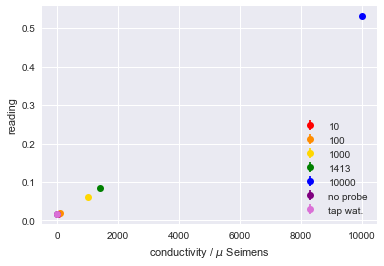

In [101]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,4))
for ii in range(7):
    ax0.errorbar(cond[ii],mean_read[ii],yerr=std_read[ii], 
                 fmt='o',color=colors[ii], label=labels[ii])
ax0.legend(loc=4)
ax0.set_ylabel('reading')
ax0.set_xlabel('conductivity / $\mu$ Seimens')


Tap water and air don't have 0 conductivity (Especially tap water!) The fitting parameter should be the reading value when the probe is not underwater (air). The standard deviation is big enough that air, tap water and 10 overlap:


Text(0.5,0,'Conductivity / $\\mu$Seimens')

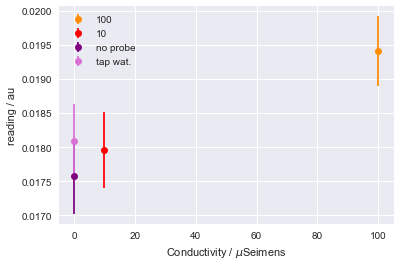

In [92]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,4))
ind = [1,0,5,6]
for ii in ind:
    ax0.errorbar(cond[ii],mean_read[ii],yerr=std_read[ii], 
                 fmt='o',color=colors[ii], label=labels[ii])

ax0.legend(loc=0)
ax0.set_ylabel('reading / au')
ax0.set_xlabel(r'Conductivity / $\mu$Seimens')

## Convert conduino readings to conductivity and salinty

Traceable Conductivity standards (from the bottle labels)

|Catalog number| Micromho/cm| Microsiemen/cm| Ohm-cm | PPM D.S.| Temperature| Lot Number | Exp date|
|::|::|::|::|::|::|::|::|
|09-328-4 11774226 | 10020| 10020 | 99.80 | 6680 | 25 | CC169226 |2/22/2019|
|09-328-11 11714236 | 1411.00| 1411.0 | 708.72 | 941 | 25 | CC17082 |4/11/2019|
|09-328-3 11764226 | 997.00| 997.00 | 1003.01 | 665 | 25 | CC16974 |3/7/2019|
|09-328-1 11754226 | 99.90| 99.90 | 10010.01 | 67 | 25 | CC17057 |4/3/2019|
|09-328-1 11744226 | 9.83| 9.83 | 101729.40 | 7 | 25 | CC17014 |3/15/2019|
| | 1| 1 | 1 | 0.66 | 25 |  | tables|

Should be /cm$^3$.

Their conversion is 

microsiemen * 0.66 = parts per million (mg/l) of dissolved solids


Mi salinities range between 1.047 g/cm^3 (6 ppt) and 0.998 g/cm^3

That is equivalent to 63000. Seawater has approx conductivity of 50000 microSiemens for salinity about 35.

In what range are my salinities? Way beyond that. At 20 degC.

|Depth| cond. mean read | density g/cm$^3$| 
|::|::|::|
|Surface|0.53||
|Shelf break|1.41||
|Deep|1.81|1.0468|

